# Lab 1: Convolutional Maps

In [1]:
# Load neccessary python modules
from skimage import io, color
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import signal
from ipywidgets import interact 

from IPython.display import Audio, display
import soundfile as sf
import numpy as np

def next_power_of_2(x):  
    return 1 if x == 0 else 2**(x - 1).bit_length()

## Blurring an Image

Lets explore bluring images using a kernel. A **kernel** is a matrix that can be used for image processing, such as blurring. To blur an image using a kernel we will preform a convolution between a kernel and an image. A **convolution** is a mathematical operation on two functions (in this case our two matrices) that produces a third function (our blurred image).

A **matrix** is a rectangular array of numbers arranged in horizontal rows and vertical columns. Below is an example of a (4,4) matrix where each value in the matrix is 1.

In [2]:
np.ones((4,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

Lets import an image of a butterfly that we can work with.

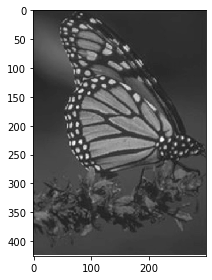

In [3]:
# Load image
butterfly = io.imread('assets/butterfly.jpg');

#convert to gray scale color map
gray_butterfly = color.rgb2gray(butterfly)

# Show image
plt.figure(); io.imshow(gray_butterfly)

Now we will use *np.random.rand* to create a random (5,5) matrix that we can use as our kernel to blur the butterfly image. Try running the cell below a few times and you will see that each time it outputs a different randomly produced matrix.

In [4]:
random_matrix = np.random.rand(5,5)
random_matrix 

array([[0.08080589, 0.04381228, 0.51247018, 0.73534708, 0.27319655],
       [0.37198707, 0.97739751, 0.61485664, 0.85443409, 0.31099665],
       [0.57308052, 0.33891212, 0.15623845, 0.11708818, 0.48623187],
       [0.74152198, 0.72180387, 0.23137681, 0.924227  , 0.28293701],
       [0.01953507, 0.67733084, 0.1888448 , 0.29546111, 0.86665948]])

Now we will convolve the image with the random matrix. To do this, we will use *signal.convolve2d* imported from the SciPy library. 

/Users/luke/opt/anaconda3/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


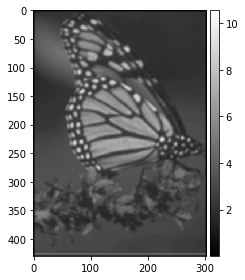

In [5]:
#using signal.convolve2d to blur butterfly
blurred_butterfly = signal.convolve2d(gray_butterfly, random_matrix)

#show blurred image
io.imshow(blurred_butterfly, cmap='gray')

What would happen if we used a larger or smaller random matrix to blur the image? Move the slider below find out. What do you notice?

In [6]:
def SquareKernel(matrix_size):
    return np.random.rand(matrix_size, matrix_size)

def AdjustKernelRadius(matrix_size):
    fim = signal.convolve2d(gray_butterfly, SquareKernel(matrix_size))
    io.imshow(fim, cmap='gray')
interact(AdjustKernelRadius, matrix_size=(1,20))

interactive(children=(IntSlider(value=10, description='matrix_size', max=20, min=1), Output()), _dom_classes=(…

<function __main__.AdjustKernelRadius(matrix_size)>

-----

## Edge Detection 

Now we will attempt to detect the edges in an image by performing a convolution of an input image and a kernel.

First, let's take a look at our image

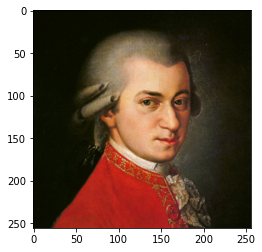

In [7]:
image = plt.imread('assets/mozart.png')
plt.imshow(image)

And let's see the dimensions of our matrix

In [8]:
image.shape

(256, 256, 3)

The matrix has the shape 256 by 256 by 3. This means the image is 256 pixels by 256 pixels, and each pixel is represented by 3 values: the red, green, and blue values.

As we saw in the previous example, a grayscale image is stored as a two-dimensional matrix, where each entry in the matrix corresponds to the intensity (from 0 to 1) of a single pixel of the image. A color image is stored as a three-dimensional matrix, since each pixel requires not just one intensity value, but three: one for red, one for green, and one for blue.

However, our input matrix must be two dimensional in order to be convolved with a two dimensional kernel. Therefore, our first step is to reduce the color image to a grayscale image, which essenitally "flattens" the three-dimensional matrix into two dimensions.

We will now apply a function to reduce our matrix to two dimensions.

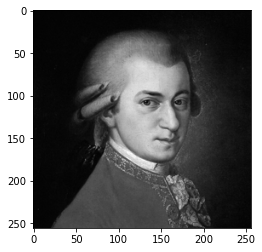

In [9]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

image_gray = rgb2gray(image)
plt.imshow(image_gray, cmap='gray')

Now let's check the dimensionality (shape) of our grayscale image.

In [10]:
image_gray.shape

(256, 256)

As we expected, our image is now represented as a two-dimensional matrix. It is still the same number of pixels (256 by 256), but there is no third dimensions for RGB values. We are now ready to convolve our image with a kernel.

For edge detection, we will convolve our image with two different kernels, and then combine the results. One kernel will identify vertical edges and the other will identify horizontal edges. These matrices approximate the derivative; a large derivatice means a large change, which is likely to be an edge. The specific matrices we are using are known as the [Sobel operators](https://en.wikipedia.org/wiki/Sobel_operator).

In [26]:
sobel_x = np.array(
    [[1, 0, -1],  
    [2, 0, -2],  
    [1, 0, -1]])
sobel_y = np.array(
    [[1, 2, 1], 
    [0, 0, 0], 
    [-1, -2, -1]])

print("sobel_x")
print("------------------")
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in sobel_x]))
print("------------------\n")
print("sobel_y")
print("------------------")
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in sobel_y]))
print("------------------")


sobel_x
------------------
1	0	-1
2	0	-2
1	0	-1
------------------

sobel_y
------------------
1	2	1
0	0	0
-1	-2	-1
------------------


Now we will convolve our image with each matrix, and view the results.

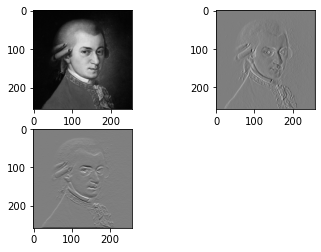

In [12]:
gradient_x = signal.convolve2d (image_gray, sobel_x)
gradient_y = signal.convolve2d (image_gray, sobel_y)

# TODO: would be nice to have titles here
plt.figure(2)
plt.subplot(2, 2, 1)
plt.imshow (image_gray, cmap="gray")
plt.subplot(2, 2, 2)
plt.imshow (gradient_x, cmap="gray")
plt.subplot(2, 2, 3)
plt.imshow (gradient_y, cmap="gray")

Finally, we combine our x and y gradients to get the overall gradient of the image, and our edge detection is complete!

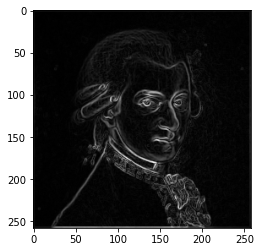

In [27]:
gradient = np.sqrt(np.square(gradient_x) + np.square(gradient_y))
gradient *= 255.0 / gradient.max()
plt.imshow (gradient, cmap='gray')

## Convolution Reverb


We'll start by loading in the two sound files we will be working with. The first recording, `anechoic1.wav`, is an anechoic (echo-free) orchestral recording of the Overture from Mozart's The Marriage of Figaro.  The second sound file, `Concertgebouw-m.wav`, is a recording from the Concert Gebouw, a concert hall in Amsterdam, Netherlands. The second sound file which will serve as our "impulse response." It captures the acoustics of the concert hall, which we can then simulate in the first file through convolution.

In [14]:
x, srx = sf.read('assets/anechoic1.wav')
h, srh = sf.read('assets/Concertgebouw-m.wav')
print(x.shape, srx)
print(h.shape, srx)        

assert srx == srh, 'sample rate must be the same in both files'

(456621,) 44100
(225298,) 44100


Run the cell below to take a listen to the two audio files.

In [15]:
display(Audio('assets/anechoic1.wav'))
display(Audio('assets/Concertgebouw-m.wav'))

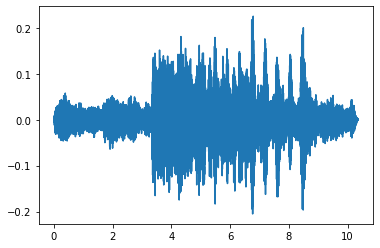

In [16]:
import matplotlib.pyplot as plt

## TODO: get proper y axis units
plt.plot(np.linspace(0, x.shape[0]/srx, num=x.shape[0]), x)

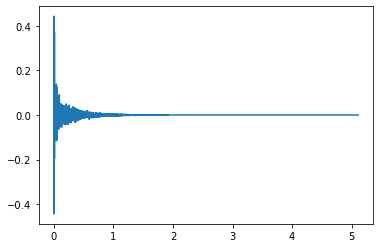

In [17]:
plt.plot(np.linspace(0, h.shape[0]/srh, h.shape[0]), h)

-----

Convolution with signals (sounds) is similar to convolution with images as we worked above. With signals, convolution can be thought of a signal sliding over another, or the weighted sum of the shifted copies of one function over all of its "space." Loosely, it is of the form

$$ y(n) = \sum_{-\infty}^{\infty} x(n)h(n) $$


With sound files, our domain becomes time which enables us to use the Convolution Theorem. The theorem states that convolution in the time domain is the same as complex multiplication in the frequency domain. In other words, we can multiply their frequency content (spectra) in the frequency domain. So, 

$$ y(t) = x(t) * h(t) = X(k)H(k) $$ 

where $X(k)$ and $H(k)$ are the Fourier Transforms of the time signals $x$ and $h$. 

In order to make the most of the Convolution Theorem, we use a Fast Fourier Transform (FFT) to transform our sound files into the frequency domain. We can then multiply the two transformed signals (which is equivalent to convolution by the theorem), and transform the multiplied signal back to the time domain, resulting in the convolved sound. 

Because FFT works best when the input size is a power of 2,  we'll first find the  closest power of 2 of the larger of the two files. 

In [18]:
if x.shape[0] > h.shape[0]:
    N = next_power_of_2(x.shape[0])
else:
    N = next_power_of_2(h.shape[0])     
N

524288

Now that we have `N`, we can use the FFT algorithm to transform the signals. The function `np.fft.rfft()` takes in two parameters:
* `x` and `h`: the input signal
* `N`: The number of points to use in the input

We'll assign the transformed `x` and `h` signals to Xk and Hk, respectively.

In [19]:
Xk = np.fft.rfft(x, N)
Hk = np.fft.rfft(h, N)

Now, by the Convolution Theorem, we can multiply the two signals, which are in the frequency domain, and take the inverse FFT. The resulting convolved signal, `y`, is back in the time domain.

In [20]:
y = np.fft.irfft(Xk * Hk)
y

array([0.00271174, 0.00257238, 0.00244476, ..., 0.00283547, 0.00279619,
       0.00275774])

In [21]:
# TODO: add some interactivity: how does changing `scale` affect the end result?
scale = .3

y *= scale

In [22]:
# TODO: add some interactivity: how does changing `direct` affect the end result?
direct = 0

y[0:x.shape[0]] += x * direct

In [23]:
print("saving data")
save_dir = "outverb.wav"
sf.write(save_dir, y, srx)
print("end")

Audio(save_dir)

saving data
end


## Deconvolution

Under specific assumptions, a room can be considered as a linear and time invariant system $(LTI)$ characterized by an impulse response $h(t)$. This can be useful in order to derive many acoustical parameters of the room using accurate measurement of the impulse response.  However, this measurment is difficult to obtain. It is often easier to use sine sweeps.

A **sine sweep** is a better realizable signal compared to an ideal impulse (which is an approximation up to the physical limitations of the system). and has an excellent signal-to-noise ration. The usual method is as follows:

* a sine sweep is played in a room, using sufficient energy
* at the same time, the recording of the room is effectuated
* finally, a deconvolution of the original sweep from the recorded sound is performed, in order to estimate the real impulse response

Now we will implement a common method to perform the **deconvolution** step:

**Wiener Deconvolution:** 

A convolution in time domain can be tought as a complex **multiplication in frequency domain**:

$$ y(t) = x(t)*h(t) = X(k)H(k) $$

where $X$ and $H$ are the Fourier transforms of the respective time signals $x$ and $h$.

Knowing the input $x$ and the output $y$ of the system, we can start building our `main` function:
* no arguments
* reads the time signals $x$ and $y$
* performs deconvoltion

In [24]:
def main():
    print("conv.py - convolution based reverberation")
    y, syx = sf.read('outverb.wav')
    x, srx = sf.read('anechoic1.wav')
    print (x.shape)    
    print (y.shape)

    scale = 3

Now, it'spossible to calculate its transfer function $h$ by performing a complex **division in frequency domain:**

$$ H(k) = \dfrac{Y(k)}{X(k)} $$

However, this method is impractical due to extreme senstivity to sounds,  so we will be using a better way to retrieve $h$.

**Wiener Deconvolution**:
* regularizing the complex division by some quantities depending on the known signals

$$ W(k) = \dfrac{Y(k)\overline{X(k)}}{|X(k)|^2 + \sigma^2} $$

In order to do this, we will create a `net_power_of_2` function to calculate the Fourier transforms of $x$ and $y$ and use these in the formula, so we can update our `main` function.

In [25]:
def next_power_of_2(x):  
    return 1 if x == 0 else 2**(x - 1).bit_length()

def main():
    print("conv.py - convolution based reverberation")
    y, syx = sf.read('outverb.wav')
    x, srx = sf.read('anechoic1.wav')
    print (x.shape)   
    print (y.shape)

    scale = 3

    N = next_power_of_2(y.shape[0])   
    ft_y = np.fft.fft (y, N)
    ft_x = np.fft.fft (x, N)
    v =  max(abs(ft_x)) * 0.005

    print ("deconvolving")
    # resynthesis
    ir_rebuild = np.fft.irfft(ft_y * np.conj (ft_x) / (v + abs (ft_x) ** 2))

    sig_len = y.shape[0] - x.shape[0]
    ir_rebuild = ir_rebuild[1:sig_len] * scale

    print ("saving data")
    sf.write ("ir_rebuild.wav", ir_rebuild, srx)

    print ("end")

Now we can call our `main` function to perform 